### Bibliotecas

In [1]:
#Bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tratamento 
import graficos as grf


### Carregamento de Dados   
Base principal ----> gapminder_full   
Bases secundaria -----> human-development-index, expected-years-of-schooling   

In [2]:
#importando base principal
local_gp = '../database/gapminder_full.csv'
data_gp = tratamento.import_data(local_gp)


Arquivo importado com sucesso!


In [3]:
df_gp = data_gp.copy()

In [4]:
#Importando base contendo valores do IDH
local_idh = '../database/human-development-index.csv'
data_idh = tratamento.import_data(local_idh)

Arquivo importado com sucesso!


In [5]:
df_idh = data_idh.copy()

In [6]:
#importando base contendo valores de escolaridade esperada
local_esc = '../database/expected-years-of-schooling.csv'
data_esc = tratamento.import_data(local_esc)


Arquivo importado com sucesso!


In [7]:
df_esc = data_esc.copy()

### Tratamento de Dados   


#### Tratamento de dados base principal

In [8]:
df_gp

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1731,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1732,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1733,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1734,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


In [9]:
tratamento.gerar_metadados(df_gp)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,country,object,0,0.0,142
1,year,int64,0,0.0,12
2,pop,float64,0,0.0,1704
3,continent,object,0,0.0,5
4,lifeExp,float64,0,0.0,1626
5,gdpPercap,float64,0,0.0,1704


In [10]:
tratamento.verifica_dados_duplicados(df_gp)

Foram encontrados 32 de registros duplicados

Prévia dos dados


,country,year,pop,continent,lifeExp,gdpPercap
72,Afghanistan,1997,2.222742e+07,Asia,41.763,635.341351
145,Bolivia,1987,6.156369e+06,Americas,57.251,2753.691490
146,Bolivia,1992,6.893451e+06,Americas,59.957,2961.699694
147,Bolivia,1997,7.693188e+06,Americas,62.050,3326.143191
148,Bolivia,2002,8.445134e+06,Americas,63.883,3413.262690
149,Bolivia,2007,9.119152e+06,Americas,65.554,3822.137084
161,Belgium,2007,1.039223e+07,Europe,79.441,33692.605080
207,Burkina Faso,1987,7.586551e+06,Africa,49.557,912.063142
232,Cambodia,1987,8.371791e+06,Asia,53.914,683.895573
345,China,1997,1.230075e+09,Asia,70.426,2289.234136


In [11]:
df_gp.drop_duplicates

<bound method DataFrame.drop_duplicates of           country  year         pop continent  lifeExp   gdpPercap
0     Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1     Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2     Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3     Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4     Afghanistan  1972  13079460.0      Asia   36.088  739.981106
...           ...   ...         ...       ...      ...         ...
1731     Zimbabwe  1987   9216418.0    Africa   62.351  706.157306
1732     Zimbabwe  1992  10704340.0    Africa   60.377  693.420786
1733     Zimbabwe  1997  11404948.0    Africa   46.809  792.449960
1734     Zimbabwe  2002  11926563.0    Africa   39.989  672.038623
1735     Zimbabwe  2007  12311143.0    Africa   43.487  469.709298

[1736 rows x 6 columns]>

In [12]:
df_gp.rename(columns={'pop' : 'population', 'lifeExp' : 'Life expectation'}, inplace= True)

In [13]:
mapa = {
    'Congo Dem. Rep' : 'Congo Democratic Republic',
    'Democratic Republic of Congo' : 'Congo Democratic Republic',
    'Korea' : 'North Korea',
    'Congo Rep' : 'Congo Republic',
    'Hong Kong China' : 'Hong Kong',
    'Korea Dem. Rep.' : 'North Korea',
    'Korea Rep.' : 'South Korea',
    'Yemen Rep.' : 'Yemen Republic',
    'Yemen' : 'Yemen Republic' 
    }
df_gp['country'] = df_gp['country'].replace(mapa)

In [14]:
valores_GDP = [-np.inf, 1135, 4465, 13845, np.inf]
categorias_GDP = ['Baixa Renda', 'Renda Média Baixa', 'Renda Média Alta', 'Alta Renda']
df_gp['Nivel de renda'] = pd.cut(df_gp['gdpPercap'], bins=valores_GDP, labels=categorias_GDP, right=True, include_lowest=True)

In [15]:
df_gp

,country,year,population,continent,Life expectation,gdpPercap,Nivel de renda
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314,Baixa Renda
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030,Baixa Renda
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710,Baixa Renda
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138,Baixa Renda
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106,Baixa Renda
...,...,...,...,...,...,...,...
1731,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306,Baixa Renda
1732,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786,Baixa Renda
1733,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960,Baixa Renda
1734,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623,Baixa Renda


#### Tratamento de dados IDH   

In [16]:
df_idh

,Entity,Code,Year,Human Development Index (UNDP)
0,Afghanistan,AFG,1980,0.228
1,Afghanistan,AFG,1985,0.273
2,Afghanistan,AFG,2002,0.373
3,Afghanistan,AFG,2003,0.383
4,Afghanistan,AFG,2004,0.398
...,...,...,...,...
4996,Zimbabwe,ZWE,2013,0.516
4997,Zimbabwe,ZWE,2014,0.525
4998,Zimbabwe,ZWE,2015,0.529
4999,Zimbabwe,ZWE,2016,0.532


In [17]:
df_idh.columns

Index(['Entity', 'Code', 'Year', 'Human Development Index (UNDP)'], dtype='object')

In [18]:
tratamento.gerar_metadados(df_idh)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,Entity,object,0,0.00,190
1,Code,object,28,0.56,189
2,Year,int64,0,0.00,30
3,Human Development Index (UNDP),float64,0,0.00,702


In [19]:
tratamento.verifica_dados_duplicados(df_idh)

Foram encontrados 0 de registros duplicados

Prévia dos dados


,Entity,Code,Year,Human Development Index (UNDP)


In [20]:
#Coluna codigo não apresenta utilidade para as analises que serão realizada
df_idh.pop('Code')

0       AFG
1       AFG
2       AFG
3       AFG
4       AFG
       ... 
4996    ZWE
4997    ZWE
4998    ZWE
4999    ZWE
5000    ZWE
Name: Code, Length: 5001, dtype: object

In [21]:
df_idh.rename(columns={'Entity' : 'country', 'Year' : 'year', 'Human Development Index (UNDP)' : 'IDH'}, inplace = True)

In [22]:
df_idh

,country,year,IDH
0,Afghanistan,1980,0.228
1,Afghanistan,1985,0.273
2,Afghanistan,2002,0.373
3,Afghanistan,2003,0.383
4,Afghanistan,2004,0.398
...,...,...,...
4996,Zimbabwe,2013,0.516
4997,Zimbabwe,2014,0.525
4998,Zimbabwe,2015,0.529
4999,Zimbabwe,2016,0.532


In [23]:
mapa = {
    'Congo Dem. Rep' : 'Congo Democratic Republic',
    'Democratic Republic of Congo' : 'Congo Democratic Republic',
    'Korea' : 'North Korea',
    'Congo Rep' : 'Congo Republic',
    'Hong Kong China' : 'Hong Kong',
    'Korea Dem. Rep.' : 'North Korea',
    'Korea Rep.' : 'South Korea',
    'Yemen Rep.' : 'Yemen Republic',
    'Yemen' : 'Yemen Republic' 
    }
df_idh['country'] = df_idh['country'].replace(mapa)

#### Tratamento de dados escolaridade    

In [24]:
df_esc

,Entity,Code,Year,Expected Years of Schooling (years)
0,Afghanistan,AFG,1990,2.6
1,Afghanistan,AFG,1991,2.9
2,Afghanistan,AFG,1992,3.2
3,Afghanistan,AFG,1993,3.6
4,Afghanistan,AFG,1994,3.9
...,...,...,...,...
5137,Zimbabwe,ZWE,2013,10.2
5138,Zimbabwe,ZWE,2014,10.3
5139,Zimbabwe,ZWE,2015,10.3
5140,Zimbabwe,ZWE,2016,10.3


In [25]:
tratamento.gerar_metadados(df_esc)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,Entity,object,0,0.00,193
1,Code,object,18,0.35,192
2,Year,int64,0,0.00,28
3,Expected Years of Schooling (years),float64,0,0.00,187


In [26]:
#Coluna codigo não apresenta utilidade para as analises que serão realizada
df_esc.pop('Code')

0       AFG
1       AFG
2       AFG
3       AFG
4       AFG
       ... 
5137    ZWE
5138    ZWE
5139    ZWE
5140    ZWE
5141    ZWE
Name: Code, Length: 5142, dtype: object

In [27]:
df_esc.describe()

,Year,Expected Years of Schooling (years)
count,5142.000000,5142.000000
mean,2003.810968,11.748269
std,8.037650,3.346839
min,1990.000000,2.100000
25%,1997.000000,9.800000
50%,2004.000000,12.100000
75%,2011.000000,13.975000
max,2017.000000,23.300000


In [28]:
limites_escolaridade = [-np.inf, 10, 14, 17, np.inf]
categorias_escolaridade = ['Baixa Escolaridade', 'Média Escolaridade', 'Alta Escolaridade', 'Muito Alta Escolaridade']
df_esc['nivel_escolaridade'] = pd.cut(df_esc['Expected Years of Schooling (years)'], bins=limites_escolaridade, labels=categorias_escolaridade, right=True, include_lowest=True)


In [29]:
df_esc['nivel_escolaridade'].value_counts()

nivel_escolaridade
Média Escolaridade         2523
Baixa Escolaridade         1372
Alta Escolaridade          1051
Muito Alta Escolaridade     196
Name: count, dtype: int64

In [30]:
df_esc.rename(columns={'Entity' : 'country', 'Year' : 'year', 'Expected Years of Schooling (years)' : 'Anos estudo'}, inplace= True)

### Integração de bases

In [31]:
df_integrado = pd.merge(df_idh, df_esc, on = ('year', 'country'), how = 'inner')

In [32]:
df_integrado = pd.merge(df_gp, df_integrado, on = ('year', 'country'), how = 'inner')

In [33]:
df_integrado

,country,year,population,continent,Life expectation,gdpPercap,Nivel de renda,IDH,Anos estudo,nivel_escolaridade
0,Afghanistan,2002,25268405.0,Asia,42.129,726.734055,Baixa Renda,0.373,6.5,Baixa Escolaridade
1,Afghanistan,2007,31889923.0,Asia,43.828,974.580338,Baixa Renda,0.429,8.7,Baixa Escolaridade
2,Albania,1992,3326498.0,Europe,71.581,2497.437901,Renda Média Baixa,0.610,10.7,Média Escolaridade
3,Albania,1997,3428038.0,Europe,72.950,3193.054604,Renda Média Baixa,0.641,10.6,Média Escolaridade
4,Albania,2002,3508512.0,Europe,75.651,4604.211737,Renda Média Alta,0.682,10.8,Média Escolaridade
...,...,...,...,...,...,...,...,...,...,...
489,Zambia,2007,11746035.0,Africa,42.384,1271.211593,Renda Média Baixa,0.503,11.4,Média Escolaridade
490,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786,Baixa Renda,0.481,9.8,Baixa Escolaridade
491,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960,Baixa Renda,0.459,9.8,Baixa Escolaridade
492,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623,Baixa Renda,0.435,9.5,Baixa Escolaridade


### Analise descritiva   

#### Analise descritiva base principal

In [34]:
df_gp.describe().round(2)

,year,population,Life expectation,gdpPercap
count,1736.00,1.736000e+03,1736.00,1736.00
mean,1979.67,3.156800e+07,59.51,7240.16
std,17.30,1.172888e+08,12.96,9839.87
min,1952.00,6.001100e+04,23.60,241.17
25%,1967.00,2.818694e+06,48.24,1202.06
50%,1982.00,7.150606e+06,60.81,3534.77
75%,1997.00,1.977102e+07,70.94,9380.25
max,2007.00,1.318683e+09,82.60,113523.13


#### Analise descritiva base integrada

In [35]:
df_integrado.describe().round(2)

,year,population,Life expectation,gdpPercap,IDH,Anos estudo
count,494.00,4.940000e+02,494.00,494.00,494.00,494.00
mean,1999.87,5.168522e+07,66.50,10369.11,0.62,11.29
std,5.60,1.744238e+08,11.27,11350.22,0.18,3.59
min,1992.00,1.259110e+05,23.60,347.00,0.21,2.20
25%,1997.00,4.559310e+06,58.48,1583.87,0.47,8.90
50%,2002.00,1.040611e+07,70.35,5764.15,0.65,11.60
75%,2007.00,3.125730e+07,75.56,15842.63,0.77,13.70
max,2007.00,1.318683e+09,82.60,49357.19,0.94,20.60


### Analises

#### Analises Mundo

##### Expectativa de Vida

In [40]:
def graficos_mundo (df, X, Y):
    """
    Plota um gráfico de linha da evolução de uma variável (Y) ao longo do tempo (X).
    Adiciona uma linha horizontal para representar a média de Y ao longo do tempo.
    
    Args:
        df (pd.DataFrame): DataFrame que contém a série temporal (preferencialmente já agregada).
        X (str): Coluna do eixo horizontal (tempo).
        Y (str): Coluna do eixo vertical (valor).
    """
    
    # 1. Calcular a média da coluna Y
    media_y = df[Y].mean()
    
    plt.figure(figsize=(12,8)) 
    
    # Plot da evolução da série temporal
    sns.lineplot(
        data=df, 
        x=X, 
        y=Y, 
        marker='o', 
        linewidth=2, 
        color='darkgreen', 
        label=Y.replace('_', ' ').title()
    ) 
    
    # 2. Adicionar a linha horizontal da média
    plt.axhline(
        y=media_y, 
        color='red', 
        linestyle='--', 
        linewidth=2,
        label=f'Média Geral ({Y.replace("_", " ").title()}): {media_y:.2f}' 
    )

    # Configurações do gráfico
    plt.xlabel(X.capitalize(), fontsize=14)
    plt.ylabel(Y.replace("_", " ").title(), fontsize=14)
    plt.xticks(df[X].unique(), rotation=45)  
    plt.title(f"Evolução Global de {Y.replace('_', ' ').title()} com Média Horizontal", fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

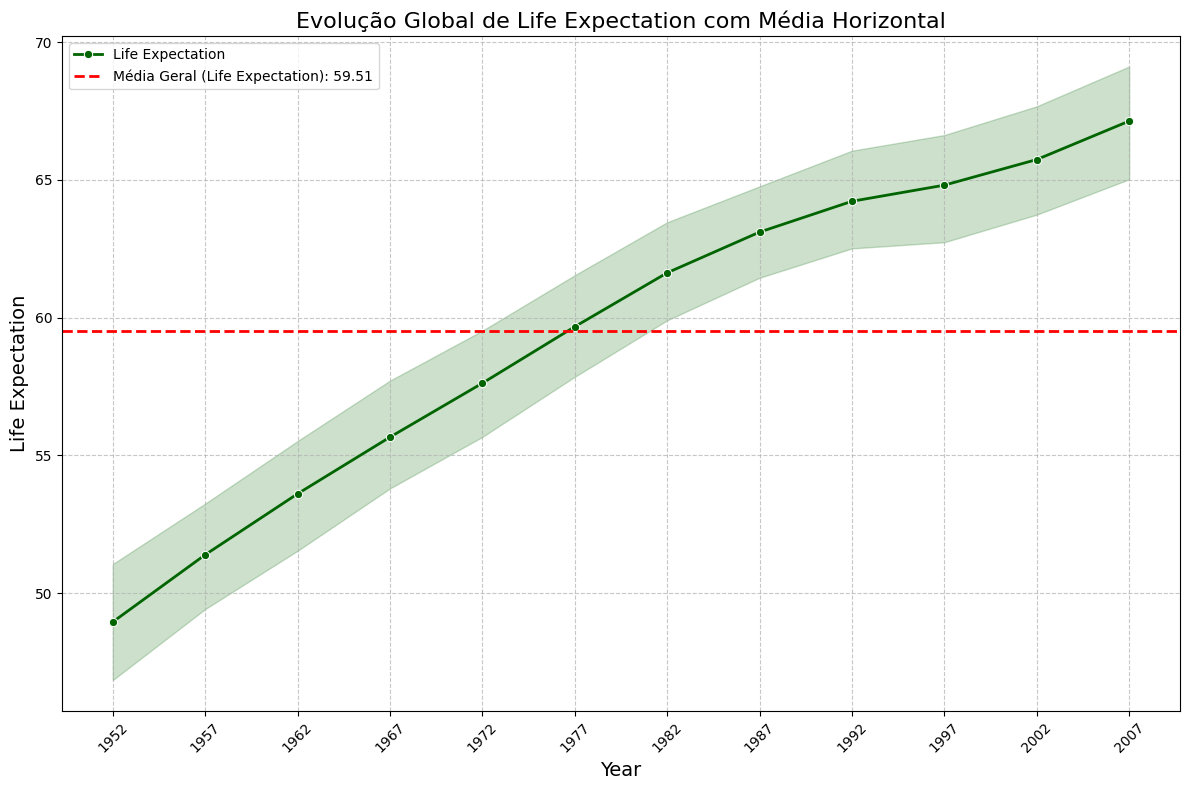

In [42]:
graficos_mundo(df_gp, 'year', 'Life expectation')

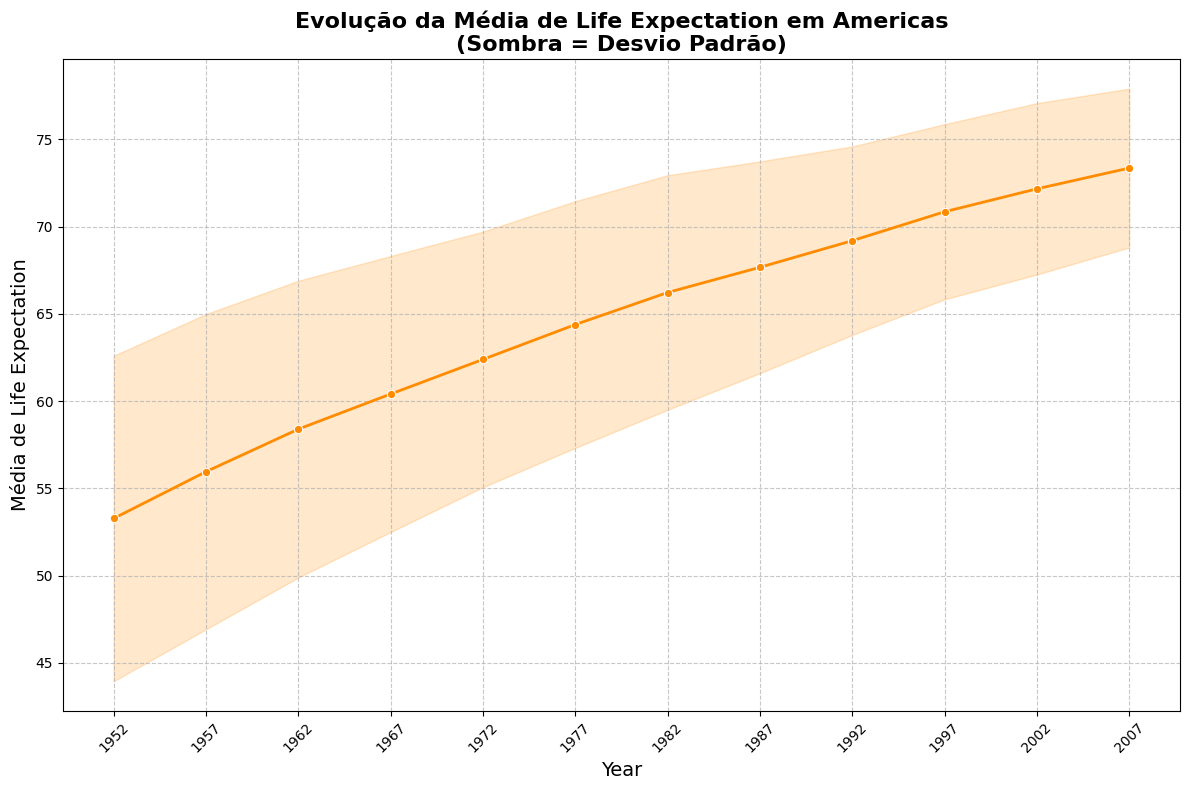

In [43]:
grf.graficos_linhas_continente(df_gp, 'Americas', 'Life expectation')

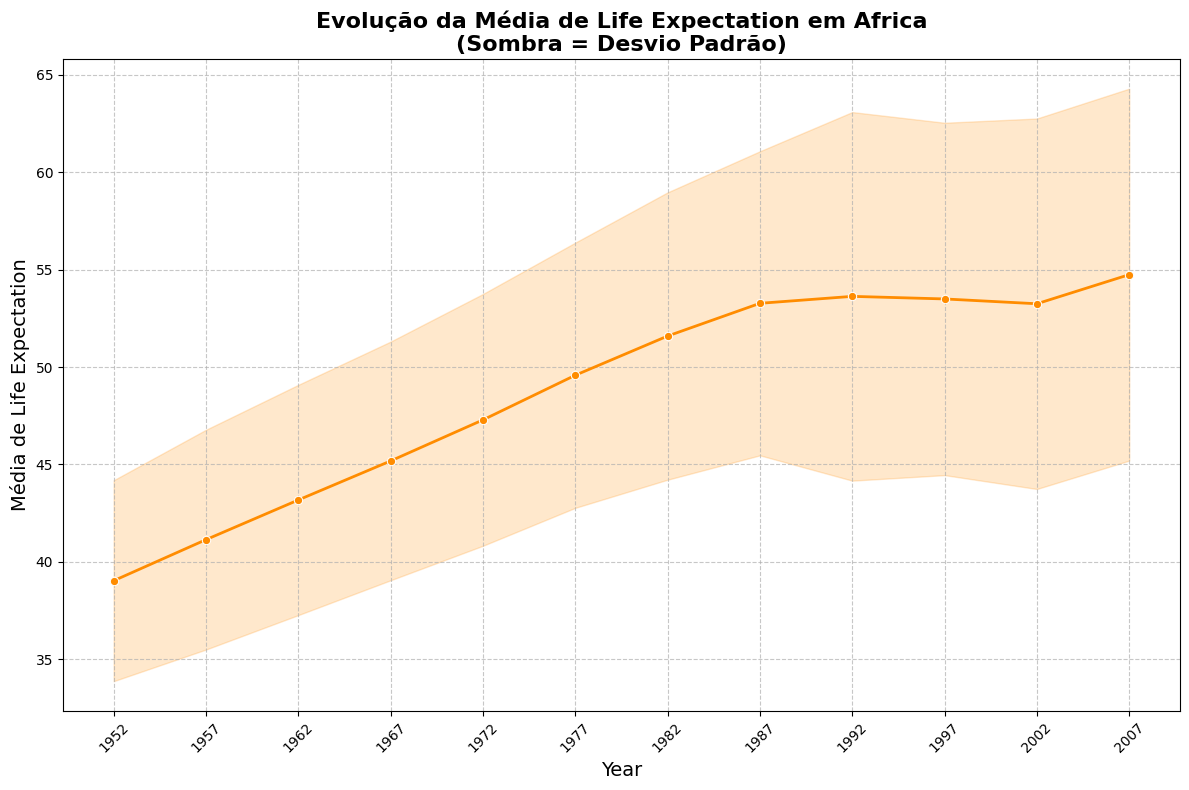

In [44]:
grf.graficos_linhas_continente(df_gp, 'Africa', 'Life expectation')

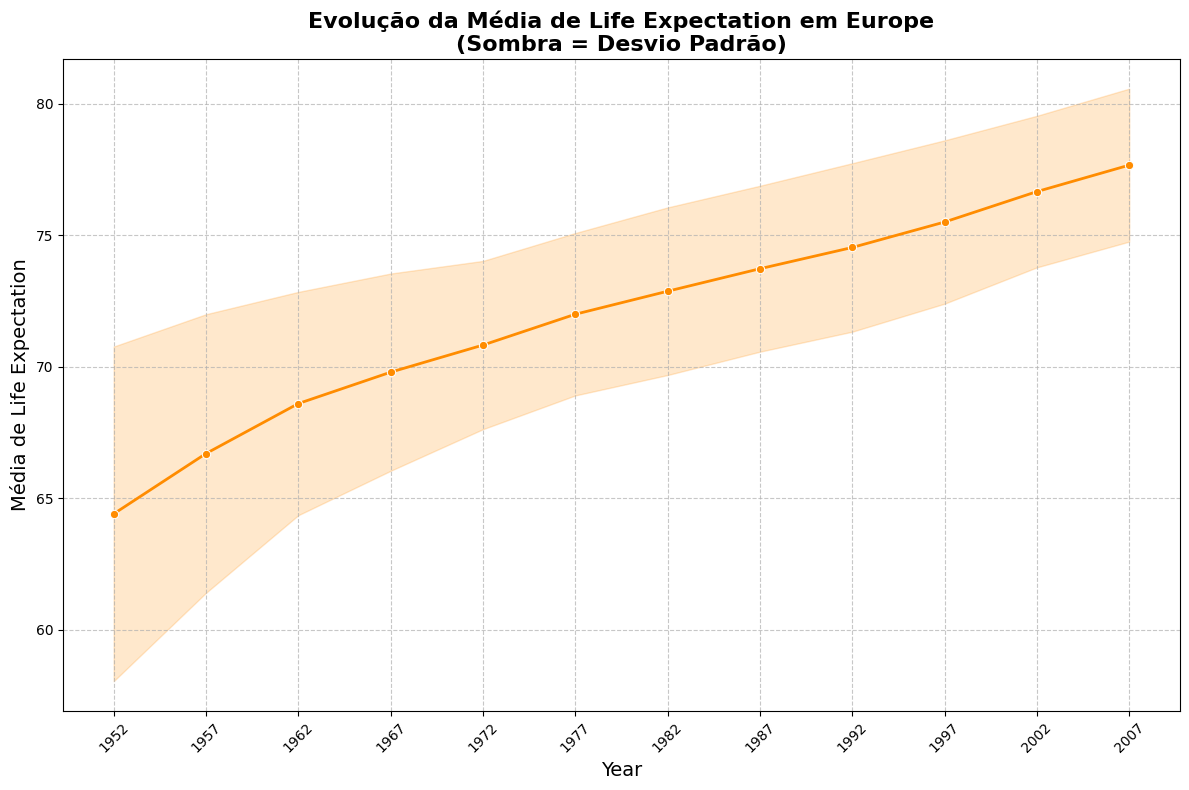

In [46]:
grf.graficos_linhas_continente(df_gp, 'Europe', 'Life expectation')

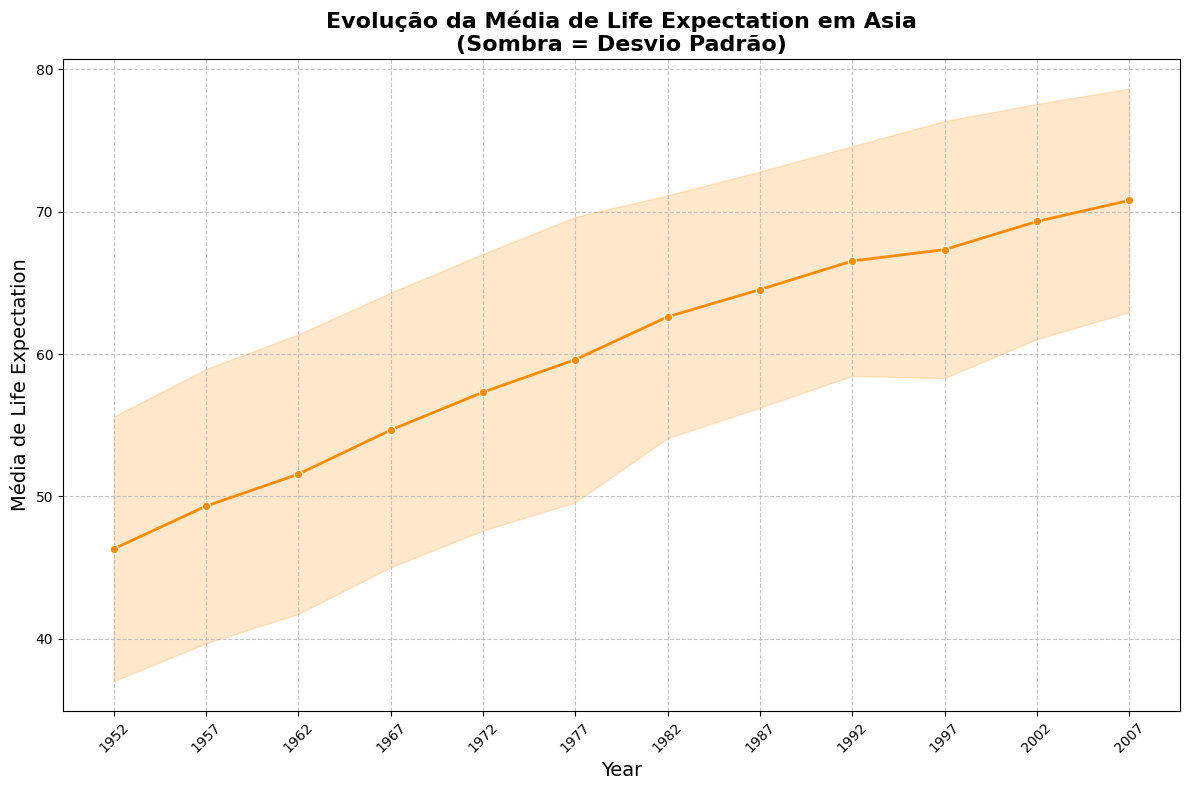

In [47]:
grf.graficos_linhas_continente(df_gp, 'Asia', 'Life expectation')

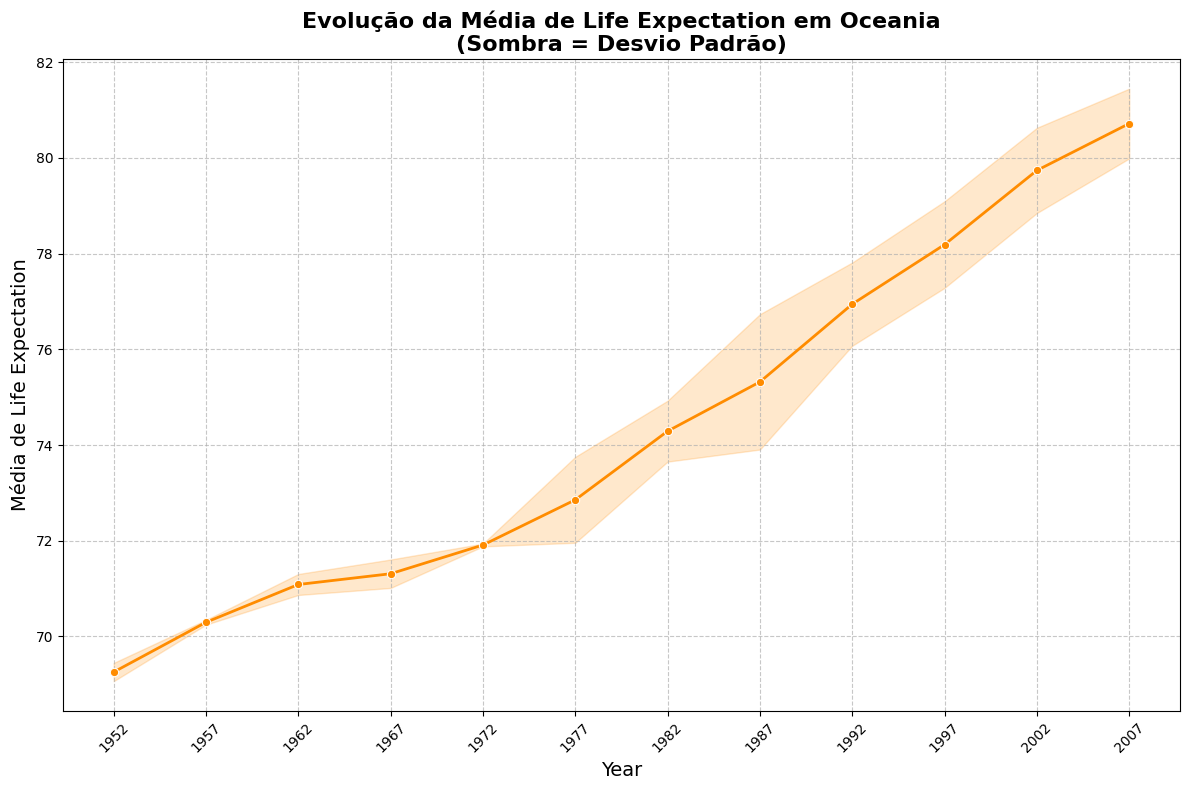

In [48]:
grf.graficos_linhas_continente(df_gp, 'Oceania', 'Life expectation')

In [51]:
df_tabela = df_gp.groupby(['year', 'continent'])['Life expectation'].mean().reset_index()
df_tabela_final = df_tabela.pivot_table(
    index='year', 
    columns='continent', 
    values='Life expectation'
)
df_tabela_final = df_tabela_final.round(2)
df_tabela_final['Média Global'] = df_tabela_final.mean(axis=1).round(2)

In [52]:
df_tabela_final

continent,Africa,Americas,Asia,Europe,Oceania,Média Global
year,,,,,,
1952,39.03,53.28,46.31,64.41,69.26,54.46
1957,41.14,55.96,49.32,66.70,70.30,56.68
1962,43.18,58.40,51.56,68.60,71.09,58.57
1967,45.18,60.41,54.66,69.80,71.31,60.27
1972,47.29,62.39,57.32,70.83,71.91,61.95
1977,49.58,64.39,59.61,72.00,72.85,63.69
1982,51.59,66.23,62.62,72.87,74.29,65.52
1987,53.27,67.67,64.53,73.73,75.32,66.90
1992,53.63,69.20,66.54,74.54,76.94,68.17


In [54]:
df_medio = df_gp.groupby('country')['Life expectation'].mean().reset_index()
df_medio = df_medio.rename(columns={'Life expectation': 'media_lifeExp'})
df_top_10 = df_medio.sort_values(by='media_lifeExp', ascending=False).head(10)
df_top_10['media_lifeExp'] = df_top_10['media_lifeExp'].round(2)

In [56]:
df_top_10

,country,media_lifeExp
57,Iceland,76.51
122,Sweden,76.18
94,Norway,75.84
88,Netherlands,75.65
123,Switzerland,75.57
20,Canada,74.90
66,Japan,74.83
5,Australia,74.66
34,Denmark,74.37
118,Spain,74.20


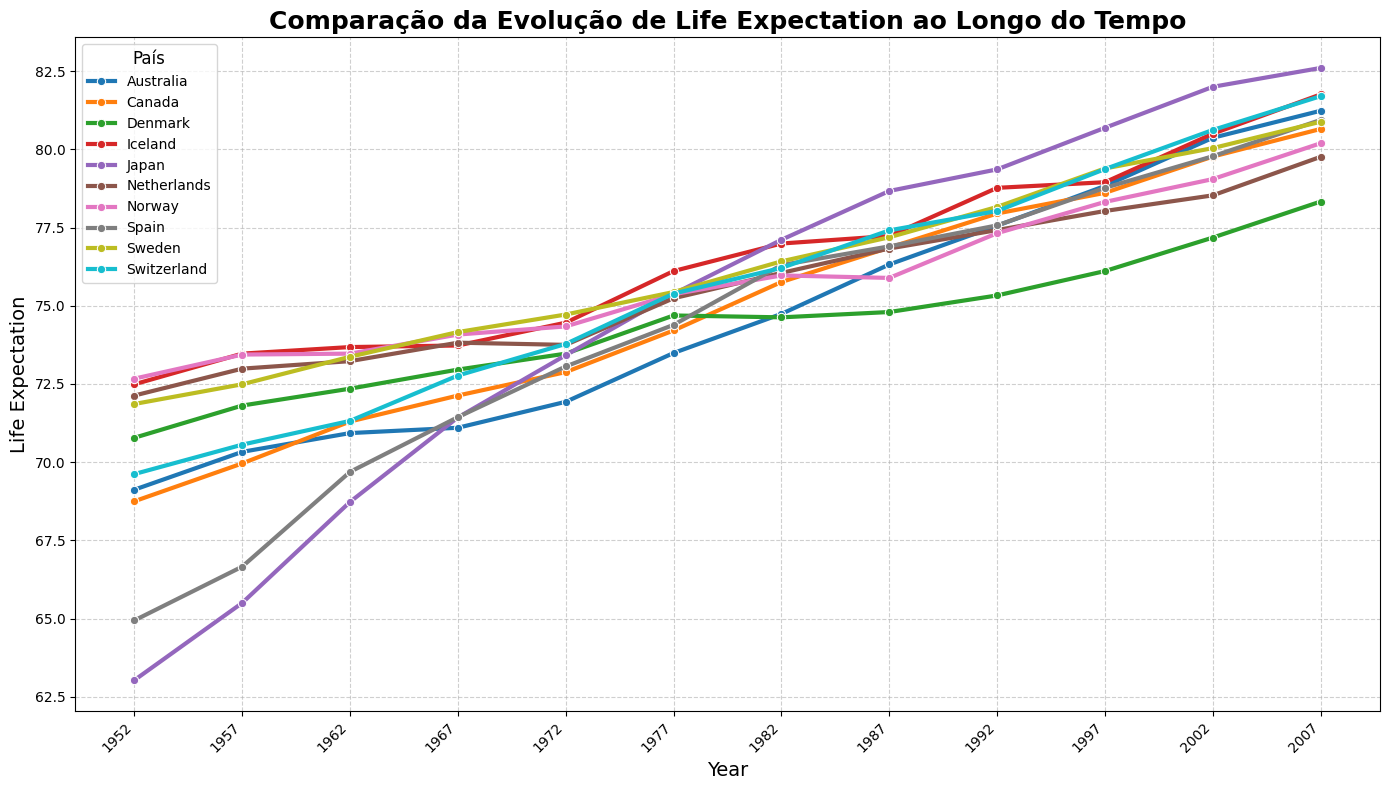

In [59]:
paises_top = df_top_10['country'].to_list()
grf.plotar_comparacao_multiplos_paises(df_gp, paises_top, 'Life expectation')

In [57]:
df_bot_10 = df_medio.sort_values(by='media_lifeExp', ascending=False).tail(10)
df_bot_10['media_lifeExp'] = df_bot_10['media_lifeExp'].round(2)
df_bot_10

,country,media_lifeExp
75,Malawi,43.35
72,Liberia,42.48
106,Rwanda,41.48
51,Guinea,41.11
115,Somalia,40.99
84,Mozambique,40.38
52,Guinea-Bissau,39.21
3,Angola,37.88
0,Afghanistan,37.81
111,Sierra Leone,36.77


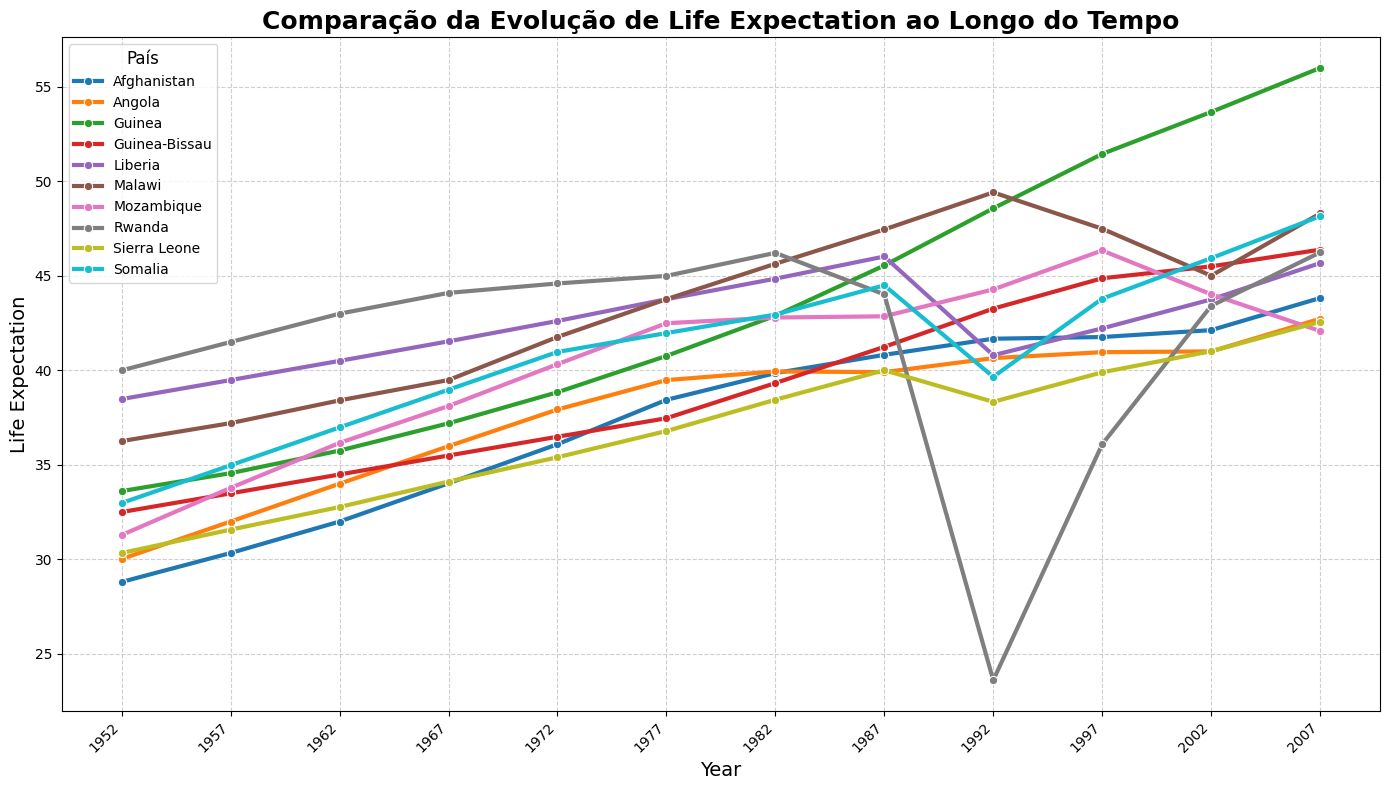

In [60]:
paises_bot = df_bot_10['country'].to_list()
grf.plotar_comparacao_multiplos_paises(df_gp, paises_bot, 'Life expectation')

Para realizar essa analise decidimos utilizar a base fornecida para o tranalho sozinha   
uma vez que apresenta todas as informações necessarias para essa analise  
O gafico em linhas apresenta a evolução da media de expectativa de vida   
